# 2、函数拟合
问题描述：
理论和实验证明，一个两层的ReLU网络可以模拟任何函数[1~5]。请自行定义一个函数, 并使用基于ReLU的神经网络来拟合此函数。

要求:
- 请自行在函数上采样生成训练集和测试集，使用训练集来训练神经网络，使用测试集来验证拟合效果。

    可以使用深度学习框架来编写模型，如tensorflow、pytorch、keras等。

    如果不使用上述框架，直接用NumPy实现可以最高加5分的附加分。

- 提交时请一并提交代码和报告。

    代码建议注释清楚（5分）

    报告至少应包含以下部分：（5分）

        函数定义、数据采集、模型描述、拟合效果。


Epoch [100/1000], Loss: 0.3283
Epoch [200/1000], Loss: 0.0455
Epoch [300/1000], Loss: 0.0197
Epoch [400/1000], Loss: 0.0190
Epoch [500/1000], Loss: 0.0188
Epoch [600/1000], Loss: 0.0185
Epoch [700/1000], Loss: 0.0182
Epoch [800/1000], Loss: 0.0178
Epoch [900/1000], Loss: 0.0173
Epoch [1000/1000], Loss: 0.0168
Test Loss: 0.0144


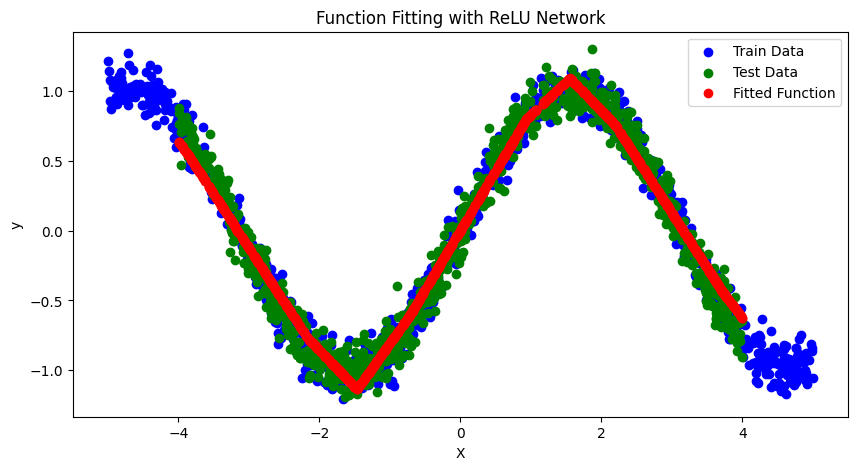

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def custom_function(x):
    return np.sin(x) + np.random.normal(0, 0.1, x.shape)

# 生成训练集和测试集
np.random.seed(0)
X_train = np.random.uniform(-5, 5, 1000)
y_train = custom_function(X_train)
X_test = np.random.uniform(-4, 4, 1000)
y_test = custom_function(X_test)

# 转换为 PyTorch 张量
X_train = torch.from_numpy(X_train).float().unsqueeze(1)
y_train = torch.from_numpy(y_train).float().unsqueeze(1)
X_test = torch.from_numpy(X_test).float().unsqueeze(1)
y_test = torch.from_numpy(y_test).float().unsqueeze(1)

# 定义模型
class ReLUModel(nn.Module):
    def __init__(self):
        super(ReLUModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 实例化模型
model = ReLUModel()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 在测试集上评估模型
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# 绘制拟合效果
plt.figure(figsize=(10, 5))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Train Data')
plt.scatter(X_test.numpy(), y_test.numpy(), color='green', label='Test Data')
plt.scatter(X_test.numpy(), test_outputs.numpy(), color='red', label='Fitted Function')
plt.legend()
plt.title('Function Fitting with ReLU Network')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
